In [26]:
import pandas as pd
import numpy as np
import seaborn as sns
from scipy import stats

file_path = 'data.csv'

data = pd.read_csv(file_path)

data["sex"].replace(['male', 'female'], [0, 1], inplace=True)
data["smoker"].replace(['no', 'yes'], [0, 1],  inplace=True)
# data_model = data.drop("region", axis=1)
# print(data_model)

region_dummies = pd.get_dummies(data['region'], prefix='is', prefix_sep='_')


# Concaténer les colonnes binaires avec le DataFrame original
data = pd.concat([data, region_dummies], axis=1)
data = data.drop(['region'], axis=1)

# Vérification des informations manquantes et des doublons
missing_data = data.isnull().sum()
duplicates = data.duplicated().sum()
data = data.drop_duplicates()




# Afficher le DataFrame avec les nouvelles colonnes binaires
print(data.head())


   age  sex     bmi  children  smoker      charges  is_northeast  \
0   19    1  27.900         0       1  16884.92400             0   
1   18    0  33.770         1       0   1725.55230             0   
2   28    0  33.000         3       0   4449.46200             0   
3   33    0  22.705         0       0  21984.47061             0   
4   32    0  28.880         0       0   3866.85520             0   

   is_northwest  is_southeast  is_southwest  
0             0             0             1  
1             0             1             0  
2             0             1             0  
3             1             0             0  
4             1             0             0  


In [27]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score


# model = KNeighborsClassifier()

X = data.drop('charges', axis=1)
y = data['charges']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# 80% pour train et 20% de test

# Initialisation du modèle de régression linéaire
model = LinearRegression()

# Entraînement du modèle
model.fit(X_train, y_train)

# Prédictions sur l'ensemble de test
y_pred = model.predict(X_test)

# Évaluation du modèle
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

In [30]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import pandas as pd

# Preprocessing for numerical features
numerical_features = X.select_dtypes(include=['float64', 'int64']).columns
numerical_transformer = StandardScaler()

# Preprocessing for categorical features
categorical_features = X.select_dtypes(include=['object']).columns
categorical_transformer = OneHotEncoder(drop='first')

# Combine preprocessing for numerical and categorical features
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_features),
        ('cat', categorical_transformer, categorical_features)
    ])

# Create a pipeline with preprocessing and model
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regression', LinearRegression())
])

# Fit the pipeline on the training data
pipeline.fit(X_train, y_train)

# Predict on the test data
y_pred = pipeline.predict(X_test)
i = 0
print(X_test)
# print(y_pred[:6])
# print(y_test[:6])
# while i < len(y_pred) or i < len(y_test):
#     print("y_pred :", y_pred[i])
#     print("y_test :", y_test[i])
#     i += 1


# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
rmse = np.sqrt(mse)

print(f"Mean Squared Error: {mse}")
print(f"RMSE: {rmse}")
print(f"R-squared: {r2}")

      age  sex     bmi  children  smoker  is_northeast  is_northwest  \
900    49    0  22.515         0       0             1             0   
1064   29    1  25.600         4       0             0             0   
1256   51    1  36.385         3       0             0             1   
298    31    0  34.390         3       1             0             1   
237    31    0  38.390         2       0             0             0   
...   ...  ...     ...       ...     ...           ...           ...   
534    64    0  40.480         0       0             0             0   
542    63    1  36.300         0       0             0             0   
760    22    1  34.580         2       0             1             0   
1284   61    0  36.300         1       1             0             0   
1285   47    1  24.320         0       0             1             0   

      is_southeast  is_southwest  
900              0             0  
1064             0             1  
1256             0            

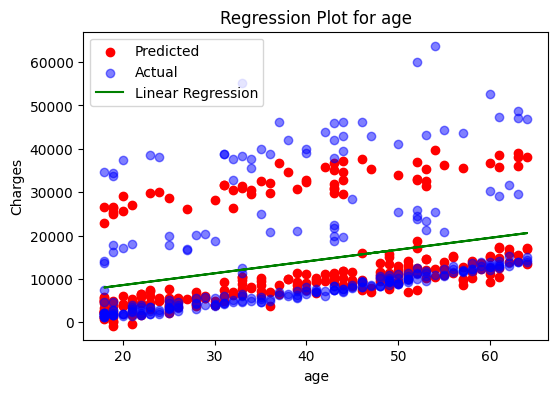

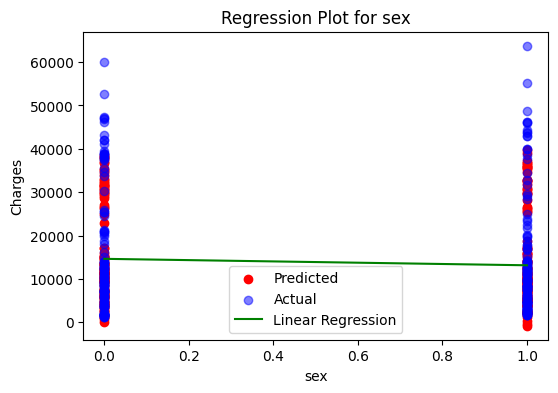

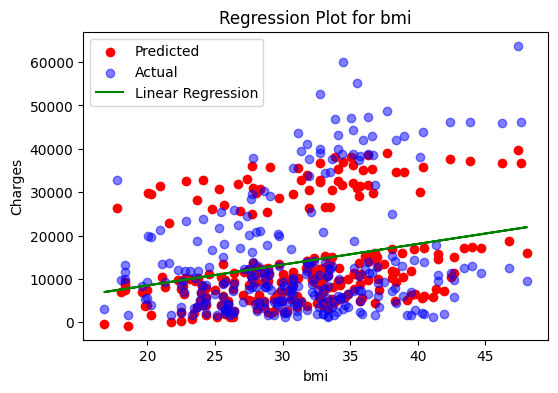

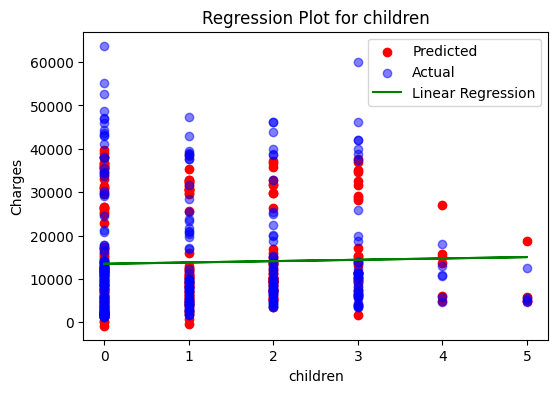

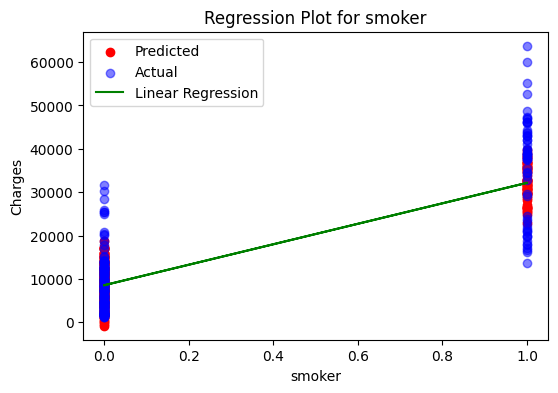

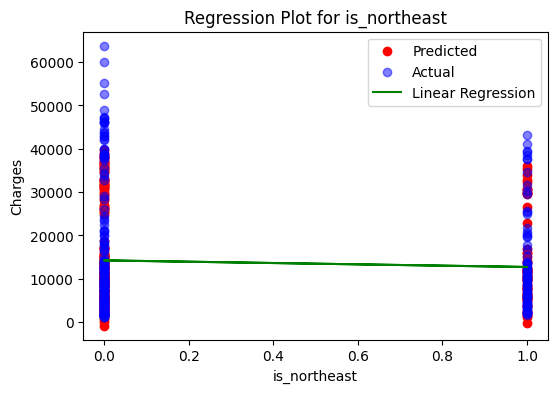

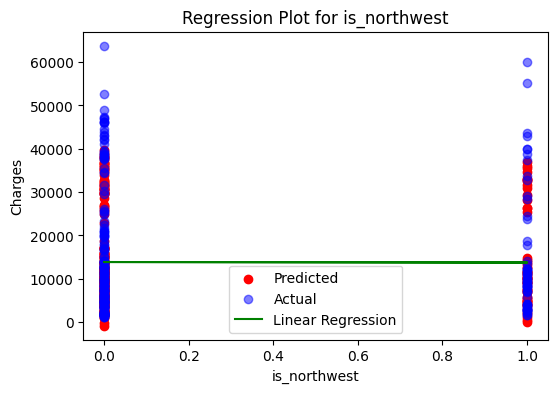

In [36]:
from sklearn.linear_model import LinearRegression

# Créer une régression linéaire
regression = LinearRegression()

# Parcourir chaque colonne de X
for col in X_df.columns:
    # Créer une figure et un axe pour chaque colonne
    fig, ax = plt.subplots(figsize=(6, 4))
    
    # Fit de la régression linéaire sur la colonne actuelle et les valeurs prédites
    regression.fit(X_df[[col]], y_pred)
    
    # Tracer les valeurs prédites en fonction de la colonne actuelle
    ax.scatter(X_df[col], y_pred, color='red', label='Predicted')
    
    # Tracer les valeurs réelles en fonction de la colonne actuelle
    ax.scatter(X_df[col], y_test, color='blue', alpha=0.5, label='Actual')
    
    # Tracer la ligne de régression linéaire pour la colonne actuelle
    ax.plot(X_df[col], regression.predict(X_df[[col]]), color='green', label='Linear Regression')
    
    # Ajouter des étiquettes et une légende pour la colonne actuelle
    ax.set_xlabel(col)
    ax.set_ylabel('Charges')
    ax.legend()
    
    # Afficher le titre basé sur la colonne
    ax.set_title(f'Regression Plot for {col}')
    
    # Afficher le graphique pour la colonne actuelle
    plt.show()
